In [1]:
import pandas
movies = pandas.read_csv("fandango_score_comparison.csv")


(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

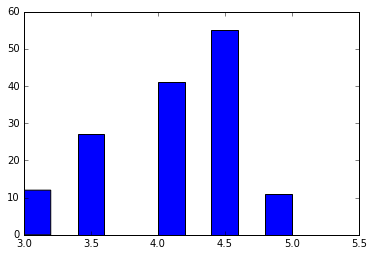

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies["Fandango_Stars"])

In [4]:
import numpy

fandango_mean = movies["Fandango_Stars"].mean()
metacritic_mean = movies["Metacritic_norm_round"].mean()
fandango_std = movies["Fandango_Stars"].std()
metacritic_std = movies["Metacritic_norm_round"].std()
fandango_median = movies["Fandango_Stars"].median()
metacritic_median = movies["Metacritic_norm_round"].median()

print(fandango_mean)
print(metacritic_mean)
print(fandango_std)
print(metacritic_std)
print(fandango_median)
print(metacritic_median)

4.08904109589
2.97260273973
0.540385977979
0.990960561374
4.0
3.0


In [5]:
movies["diff"] = numpy.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"]) 

In [7]:
movies.sort_values(by = "diff").head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,diff
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0,0.0
39,Maps to the Stars (2015),60,46,67,5.8,6.3,3.5,3.1,3.00,2.30,...,3.0,2.5,3.5,3.0,3.0,46,22440,35,0.4,0.0
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,4.0,3.6,4.70,3.50,...,4.5,3.5,4.0,3.5,3.5,14,1151,281,0.4,0.0
117,Testament of Youth (2015),81,79,77,7.9,7.3,4.0,3.9,4.05,3.95,...,4.0,4.0,4.0,4.0,3.5,15,5495,127,0.1,0.0
111,Into the Woods (2014),71,50,69,6.1,6.0,3.5,3.4,3.55,2.50,...,3.5,2.5,3.5,3.0,3.0,307,81679,13055,0.1,0.0


In [9]:
from scipy.stats import linregress 

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
r_value

0.17844919073895882

In [10]:
predicted = 3 * slope + intercept
predicted


4.0917071528212041

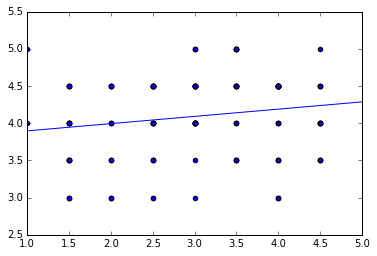

In [11]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()